In [1]:
import pandas as pd
pd.set_option('display.max_columns', 3000)
pd.set_option('display.max_rows', 5000)

import warnings
warnings.filterwarnings('ignore')

#Extend cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
df = pd.read_csv("D:/Work/Gre/UTD/Courses/Fall/MIS6341/Softwares/Python/ml-fall-2023/Project2/SBA_loans_project_2.csv")
df.drop(columns="index",inplace=True)

In [3]:
df

,City,State,Zip,Bank,BankState,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,MIS_Status
0,NEW YORK,NY,10003,JPMORGAN CHASE BANK NATL ASSOC,IL,561439,9,1.0,1,9,1,1,0,N,68000.0,0.0,68000.0,34000.0,0
1,PAWTUCKET,RI,2860,CITIZENS BANK NATL ASSOC,RI,541810,8,1.0,4,12,0,1,N,N,90000.0,0.0,90000.0,45000.0,1
2,ISSAQUAH,WA,98027,FIRST-CITIZENS BK & TR CO,WA,448210,9,2.0,0,0,1,0,N,N,450000.0,0.0,450000.0,337500.0,0
3,HURST,TX,76053,WILSHIRE BANK,CA,722213,4,1.0,0,4,1,1,0,N,140000.0,0.0,165000.0,82500.0,0
4,ALPINE,CA,91901,CALIFORNIA BANK & TRUST,CA,233210,1,1.0,0,1,1,2,Y,N,50000.0,0.0,50000.0,25000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800250,Kenmore,NY,14217,KEYBANK NATIONAL ASSOCIATION,OH,561720,112,1.0,0,0,1,1,N,N,45500.0,0.0,45500.0,22750.0,0
800251,MENOMONEE FALLS,WI,53051,WAUKESHA STATE BANK,WI,337110,75,1.0,0,75,1,1,0,N,550000.0,0.0,550000.0,412500.0,0
800252,LONGVIEW,TX,75604,CAPITAL ONE NATL ASSOC,VA,517310,2,1.0,0,0,1,1,0,Y,128800.0,0.0,135000.0,114750.0,0
800253,CAMDEN,NJ,8105,BANK OF AMERICA NATL ASSOC,RI,447110,4,2.0,0,0,1,1,Y,N,100000.0,0.0,100000.0,50000.0,0


In [4]:
df.isnull().sum()

City                   26
State                  13
Zip                     0
Bank                 1381
BankState            1386
NAICS                   0
NoEmp                   0
NewExist              127
CreateJob               0
RetainedJob             0
FranchiseCode           0
UrbanRural              0
RevLineCr            4016
LowDoc               2316
DisbursementGross       0
BalanceGross            0
GrAppv                  0
SBA_Appv                0
MIS_Status              0
dtype: int64

In [5]:
#show unique values in each column and its data type
for col in df.columns:
    print(f'{col} unique values are {df[col].unique()}')
    print("\n")
    print(f'{col} data type is {df[col].dtype}')

City unique values are ['NEW YORK' 'PAWTUCKET' 'ISSAQUAH' ... 'ST  FRANCIS' 'Stevens point'
 'Pylesville']


City data type is object
State unique values are ['NY' 'RI' 'WA' 'TX' 'CA' 'NC' 'MN' 'MO' 'FL' 'IA' 'IL' 'DC' 'PA' 'AL'
 'MS' 'OH' 'MA' 'NJ' 'ME' 'NV' 'LA' 'MI' 'IN' 'GA' 'UT' 'VA' 'WI' 'TN'
 'KS' 'NH' 'CO' 'CT' 'KY' 'AZ' 'ID' 'DE' 'SD' 'AR' 'MD' 'OK' 'SC' 'NM'
 'MT' 'NE' 'OR' 'WY' 'AK' 'HI' 'VT' 'ND' 'WV' nan]


State data type is object
Zip unique values are [10003  2860 98027 ... 78944 17814 95812]


Zip data type is int64
Bank unique values are ['JPMORGAN CHASE BANK NATL ASSOC' 'CITIZENS BANK NATL ASSOC'
 'FIRST-CITIZENS BK & TR CO' ... 'TULSA NATIONAL BANCSHARES, INC'
 'BEACH PLAZA LLC' 'THE LEADERS BANK']


Bank data type is object
BankState unique values are ['IL' 'RI' 'WA' 'CA' 'NC' 'MN' 'MO' 'OR' 'FL' 'IA' 'SD' 'DC' 'TX' 'PA'
 'VA' 'AL' 'OH' 'MS' 'IN' 'MA' 'ME' 'MI' 'DE' 'UT' 'SC' 'NY' 'KS' 'CO'
 'LA' 'WI' 'CT' 'AZ' 'AR' 'MD' 'OK' 'NM' 'ID' 'MT' 'NJ' 'KY' 'NE' 'WY'
 'GA

In [6]:
df

,City,State,Zip,Bank,BankState,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,MIS_Status
0,NEW YORK,NY,10003,JPMORGAN CHASE BANK NATL ASSOC,IL,561439,9,1.0,1,9,1,1,0,N,68000.0,0.0,68000.0,34000.0,0
1,PAWTUCKET,RI,2860,CITIZENS BANK NATL ASSOC,RI,541810,8,1.0,4,12,0,1,N,N,90000.0,0.0,90000.0,45000.0,1
2,ISSAQUAH,WA,98027,FIRST-CITIZENS BK & TR CO,WA,448210,9,2.0,0,0,1,0,N,N,450000.0,0.0,450000.0,337500.0,0
3,HURST,TX,76053,WILSHIRE BANK,CA,722213,4,1.0,0,4,1,1,0,N,140000.0,0.0,165000.0,82500.0,0
4,ALPINE,CA,91901,CALIFORNIA BANK & TRUST,CA,233210,1,1.0,0,1,1,2,Y,N,50000.0,0.0,50000.0,25000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800250,Kenmore,NY,14217,KEYBANK NATIONAL ASSOCIATION,OH,561720,112,1.0,0,0,1,1,N,N,45500.0,0.0,45500.0,22750.0,0
800251,MENOMONEE FALLS,WI,53051,WAUKESHA STATE BANK,WI,337110,75,1.0,0,75,1,1,0,N,550000.0,0.0,550000.0,412500.0,0
800252,LONGVIEW,TX,75604,CAPITAL ONE NATL ASSOC,VA,517310,2,1.0,0,0,1,1,0,Y,128800.0,0.0,135000.0,114750.0,0
800253,CAMDEN,NJ,8105,BANK OF AMERICA NATL ASSOC,RI,447110,4,2.0,0,0,1,1,Y,N,100000.0,0.0,100000.0,50000.0,0


In [7]:
for i in df['RevLineCr']:
    if i not in ['Y','N']:
        df['RevLineCr'].replace(i,'N',inplace=True)
print("RevLineCr",df['RevLineCr'].unique())

for i in df['LowDoc']:
    if i not in ['Y','N']:
        df['LowDoc'].replace(i,'N',inplace=True)
print("LowDoc",df['LowDoc'].unique())

for i in df['NewExist']:
    if i not in [1,2]:
        df['NewExist'].replace(i,None,inplace=True)
print("NewExist",df['NewExist'].unique())

RevLineCr ['N' 'Y']
LowDoc ['N' 'Y']
NewExist [1.0 2.0 None]


In [8]:
df.isnull().sum()

City                   26
State                  13
Zip                     0
Bank                 1381
BankState            1386
NAICS                   0
NoEmp                   0
NewExist             1057
CreateJob               0
RetainedJob             0
FranchiseCode           0
UrbanRural              0
RevLineCr               0
LowDoc                  0
DisbursementGross       0
BalanceGross            0
GrAppv                  0
SBA_Appv                0
MIS_Status              0
dtype: int64

In [9]:
category_cols=['City', 'State', 'Bank', 'BankState', 'RevLineCr', 'LowDoc','NewExist']
for column in category_cols:
  df[column]=df[column].fillna(df[column].mode()[0])

In [10]:
df.isnull().sum()

City                 0
State                0
Zip                  0
Bank                 0
BankState            0
NAICS                0
NoEmp                0
NewExist             0
CreateJob            0
RetainedJob          0
FranchiseCode        0
UrbanRural           0
RevLineCr            0
LowDoc               0
DisbursementGross    0
BalanceGross         0
GrAppv               0
SBA_Appv             0
MIS_Status           0
dtype: int64

In [11]:
from sklearn.model_selection import train_test_split

X_train,X_test = train_test_split(df,test_size=0.3,random_state=123)
X_train.shape, X_test.shape

((560178, 19), (240077, 19))

``` Training set has 560178 rows and testing set has 240077 samples

Target encoding is a data preprocessing technique used to convert categorical variables into numerical values that can be used by machine learning algorithms. It works by replacing each category with the average value of the target variable for that category. This can be helpful for algorithms that cannot handle categorical variables directly.

In this case the target variable is "MIS_Status"```

In [12]:
# Target encoder
import category_encoders as ce
categorical_columns = ['City', 'State', 'Bank', 'BankState', 'RevLineCr', 'LowDoc','NewExist', 'UrbanRural']

encoder = ce.TargetEncoder(cols=categorical_columns)
encoder.fit(X_train, X_train['MIS_Status'])

train_encoded = encoder.transform(X_train)
test_encoded = encoder.transform(X_test)

# Renaming the columns
train_encoded.rename(columns={col: col + "_trg" if col in categorical_columns else col for col in train_encoded.columns}, inplace=False)
test_encoded.rename(columns={col: col + "_trg" if col in categorical_columns else col for col in test_encoded.columns}, inplace=False)

train_encoded.head()

,City,State,Zip,Bank,BankState,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,MIS_Status
148172,0.215946,0.165802,45648,0.740692,0.217642,452990,2,0.17067,2,2,0,0.186517,0.152625,0.186815,12500.0,0.0,12500.0,10625.0,1
744579,0.226933,0.165802,43240,0.133135,0.158188,445310,7,0.17067,0,0,0,0.243731,0.152625,0.186815,20000.0,0.0,20000.0,10000.0,0
321200,0.252778,0.196143,21037,0.194430,0.076619,0,3,0.17067,0,0,1,0.070886,0.152625,0.089154,25000.0,0.0,25000.0,20000.0,0
74901,0.275938,0.184227,90071,0.141177,0.178801,541310,12,0.17067,12,12,1,0.243731,0.251879,0.186815,985500.0,0.0,350000.0,175000.0,1
426895,0.057056,0.184227,95037,0.412096,0.380604,561720,1,0.17067,0,1,0,0.243731,0.152625,0.186815,50000.0,0.0,50000.0,25000.0,0


StandardScaler in scikit-learn is a preprocessing technique that centers and scales numerical features such that they have a mean of zero and a standard deviation of one.

We will make use of the StandardScaler, which is used to transform both the training and test data in the same way, ensuring that the features have the same mean and standard deviation in both datasets.

Here we will scale it on the training set and transform on both training and testing

In [13]:
from sklearn.preprocessing import StandardScaler
from copy import deepcopy

numerical_columns = [ 'NoEmp', 'CreateJob', 'RetainedJob', 'GrAppv', 'SBA_Appv', 'DisbursementGross', 'BalanceGross']
scaler = StandardScaler()
train_encoded[numerical_columns] = scaler.fit_transform(train_encoded[numerical_columns])
test_encoded[numerical_columns] = scaler.transform(test_encoded[numerical_columns])

train_encoded.head()


,City,State,Zip,Bank,BankState,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,MIS_Status
148172,0.215946,0.165802,45648,0.740692,0.217642,452990,-0.123748,0.17067,-0.026808,-0.036871,0,0.186517,0.152625,0.186815,-0.654946,-0.002095,-0.635102,-0.606817,1
744579,0.226933,0.165802,43240,0.133135,0.158188,445310,-0.058247,0.17067,-0.035352,-0.045405,0,0.243731,0.152625,0.186815,-0.628851,-0.002095,-0.608622,-0.609553,0
321200,0.252778,0.196143,21037,0.194430,0.076619,0,-0.110648,0.17067,-0.035352,-0.045405,1,0.070886,0.152625,0.089154,-0.611454,-0.002095,-0.590969,-0.565780,0
74901,0.275938,0.184227,90071,0.141177,0.178801,541310,0.007255,0.17067,0.015917,0.005801,1,0.243731,0.251879,0.186815,2.730474,-0.002095,0.556485,0.112702,1
426895,0.057056,0.184227,95037,0.412096,0.380604,561720,-0.136849,0.17067,-0.035352,-0.041138,0,0.243731,0.152625,0.186815,-0.524470,-0.002095,-0.502703,-0.543894,0


We have created Feature extraction by making use of old variables in the following way


(1) Log_Disbursement which gives the natural logarithmic form of DisbursementGross variable

(2) Log_GrAppv the logarithmic version of the approved loan amount by the bank

(3) Log_SBA_Appv, the logarithmic amount of the approved loan that will be assisted by SBA 

(4) Log_BalanceGross, is the logarithmic amount of total amount in an account or the total value of a financial asset or liability before any deductions or adjustments are made.

(5) TotalJobs variable which is an addition of Createjobs(New people recruited) and RetainedJob (workers working before)

(6) IncomeToLoan its values are calculated by dividing the 'DisbursementGross' column by the 'SBA_Appv' column for each corresponding row. This ratio can help you analyze the relationship between the amount disbursed and the approved SBA loan amount in terms of income.

(7)  EmployeesToLoanRatio, its values are calculated by dividing the 'NoEmp' column (number of employees) by the 'SBA_Appv' column (approved SBA loan amount) for each corresponding row. This ratio can help you analyze the relationship between the number of employees and the size of the SBA loan approved for each entry in the dataset.

(8) JobPerLoan, its values are calculated by dividing the 'TotalJobs' column (representing the total number of jobs) by the 'SBA_Appv' column (approved SBA loan amount) for each corresponding row. This ratio can help you analyze the impact of the SBA loan on job creation or support, expressed as the number of jobs per unit of loan amount approved.

(9) Gauren_SBA_Appv, Its values are calculated by dividing the 'GrAppv' column (gross amount approved by the lender) by the 'SBA_Appv' column (the approved SBA loan amount) for each corresponding row. This ratio helps you analyze the extent to which the SBA is guaranteeing the loan relative to the total loan amount approved by the lender.

(10) DefaultRate, Finally, we create a new feature 'DefaultRate' in the 'train_encoded' DataFrame and set its value to the calculated default rate for the particular group of loans based on the "MIS_Status" variable. This feature will represent the percentage of loans in the group that are classified as defaults.

In [14]:
# Adding Features
import numpy as np
# Apply the log transformation to the specific feature in your training data
#small_constant = 1e-10  # You can adjust this constant as needed
# df['LogColumn'] = np.log(df['OriginalColumn'] + small_constant)
train_encoded['Log_DisbursementGross'] = np.log1p(train_encoded['DisbursementGross'])
train_encoded['Log_GrAppv'] = np.log1p(train_encoded['GrAppv'])
train_encoded['Log_SBA_Appv'] = np.log1p(train_encoded['SBA_Appv'])
train_encoded['Log_BalanceGross'] = np.log1p(train_encoded['BalanceGross'])
train_encoded['TotalJobs'] = train_encoded['CreateJob'] + train_encoded['RetainedJob']
#train_encoded['Loan_Efficiency'] = train_encoded['DisbursementGross'] / (train_encoded['CreateJob'] + train_encoded['RetainedJob'] + 1)
# Calculate 'LoanToIncomeRatio' as a ratio of 'SBA_Appv' to 'DisbursementGross'
train_encoded['IncomeToLoanRatio'] = train_encoded['DisbursementGross'] / train_encoded['SBA_Appv']
# Calculate 'LoanToEmployeesRatio' as a ratio of 'SBA_Appv' to 'NoEmp'
train_encoded['EmployeesToLoanRatio'] = train_encoded['NoEmp'] / train_encoded['SBA_Appv']
# Create a binary feature to indicate loans with a balance ('BalanceGross' > 0)
#train_encoded['HasBalance'] = (train_encoded['BalanceGross'] > 0).astype(int)
# Calculate 'LoanPerJob' as a ratio of 'SBA_Appv' to 'TotalJobs'
train_encoded['JobPerLoan'] = train_encoded['TotalJobs'] / train_encoded['SBA_Appv'] 
# Calculate SBA's Gaurenteed Portion of Approved Loan
train_encoded['Gauren_SBA_Appv'] = train_encoded['GrAppv'] / train_encoded['SBA_Appv']
# Filter the DataFrame to include only the relevant rows
default_group = train_encoded[train_encoded['MIS_Status'].isin([0, 1])]
# Calculate the total number of loans in the filtered group
total_loans = len(default_group)
# Calculate the number of defaults (CHGOFF) in the filtered group
default_loans = len(default_group[default_group['MIS_Status'] == 1])
# Calculate the default rate as a percentage
default_rate = (default_loans / total_loans) * 100
# Create a new feature 'DefaultRate' with the calculated default rate
train_encoded['DefaultRate'] = default_rate

In [15]:
# Adding Features
import numpy as np
# Apply the log transformation to the specific feature in your training data
#small_constant = 1e-10  # You can adjust this constant as needed
# df['LogColumn'] = np.log(df['OriginalColumn'] + small_constant)
test_encoded['Log_DisbursementGross'] = np.log1p(test_encoded['DisbursementGross'])
test_encoded['Log_GrAppv'] = np.log1p(test_encoded['GrAppv'])
test_encoded['Log_SBA_Appv'] = np.log1p(test_encoded['SBA_Appv'])
test_encoded['Log_BalanceGross'] = np.log1p(test_encoded['BalanceGross'])
test_encoded['TotalJobs'] = test_encoded['CreateJob'] + test_encoded['RetainedJob']
#train_encoded['Loan_Efficiency'] = train_encoded['DisbursementGross'] / (train_encoded['CreateJob'] + train_encoded['RetainedJob'] + 1)
# Calculate 'LoanToIncomeRatio' as a ratio of 'SBA_Appv' to 'DisbursementGross'
test_encoded['IncomeToLoanRatio'] = test_encoded['DisbursementGross'] / test_encoded['SBA_Appv']
# Calculate 'LoanToEmployeesRatio' as a ratio of 'SBA_Appv' to 'NoEmp'
test_encoded['EmployeesToLoanRatio'] = test_encoded['NoEmp'] / test_encoded['SBA_Appv']
# Create a binary feature to indicate loans with a balance ('BalanceGross' > 0)
#train_encoded['HasBalance'] = (train_encoded['BalanceGross'] > 0).astype(int)
# Calculate 'LoanPerJob' as a ratio of 'SBA_Appv' to 'TotalJobs'
test_encoded['JobPerLoan'] = test_encoded['TotalJobs'] / test_encoded['SBA_Appv'] 
# Calculate SBA's Gaurenteed Portion of Approved Loan
test_encoded['Gauren_SBA_Appv'] = test_encoded['GrAppv'] / test_encoded['SBA_Appv']
# Filter the DataFrame to include only the relevant rows
default_group = test_encoded[test_encoded['MIS_Status'].isin([0, 1])]
# Calculate the total number of loans in the filtered group
total_loans = len(default_group)
# Calculate the number of defaults (CHGOFF) in the filtered group
default_loans = len(default_group[default_group['MIS_Status'] == 1])
# Calculate the default rate as a percentage
default_rate = (default_loans / total_loans) * 100
# Create a new feature 'DefaultRate' with the calculated default rate
test_encoded['DefaultRate'] = default_rate

In [16]:
train_encoded.columns

Index(['City', 'State', 'Zip', 'Bank', 'BankState', 'NAICS', 'NoEmp',
       'NewExist', 'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural',
       'RevLineCr', 'LowDoc', 'DisbursementGross', 'BalanceGross', 'GrAppv',
       'SBA_Appv', 'MIS_Status', 'Log_DisbursementGross', 'Log_GrAppv',
       'Log_SBA_Appv', 'Log_BalanceGross', 'TotalJobs', 'IncomeToLoanRatio',
       'EmployeesToLoanRatio', 'JobPerLoan', 'Gauren_SBA_Appv', 'DefaultRate'],
      dtype='object')

In [17]:
X_train = train_encoded.copy()
X_test = test_encoded.copy()

In [18]:
y_train = X_train['MIS_Status']
X_train.drop(columns='MIS_Status', axis=1, inplace=True)
y_test = X_test['MIS_Status']
X_test.drop(columns='MIS_Status', axis=1, inplace=True)


In [19]:
import lightgbm as lgb
from sklearn.metrics import roc_auc_score

train_data = lgb.Dataset(data=X_train, label=y_train, params={"verbose":-1})
test_data = lgb.Dataset(data=X_test, label=y_test, params={"verbose":-1})
lgb_clf = lgb.train(params={"verbose":-1},
                    train_set=train_data)

In [20]:
from sklearn.metrics import roc_auc_score
print("AUC score on Test dataset:", roc_auc_score(y_test, lgb_clf.predict(X_test)))
print("AUC score on Train dataset:", roc_auc_score(y_train, lgb_clf.predict(X_train)))

AUC score on Test dataset: 0.8205511277259651
AUC score on Train dataset: 0.8468756526040521


In [21]:
from optuna.integration import LightGBMPruningCallback
import tqdm as notebook_tqdm
from sklearn.model_selection import StratifiedKFold
import lightgbm as lgb
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import optuna
import warnings

warnings.filterwarnings("ignore", category=UserWarning)
study_model_iteractions = {}

def objective(trial, X, y):
    param_grid = {
        # Refer to the Official guide : https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html
        "num_iterations": 10000,
        "num_threads": 16,
        "learning_rate": trial.suggest_float("learning_rate", 1e-1, 0.8, log=True),
        #"num_leaves": trial.suggest_int("num_leaves", 50, 150, step=5),
        "num_leaves": trial.suggest_int("num_leaves", 20, 700, step=10),
        #"num_leaves": trial.suggest_int("num_leaves", 2, 2**8, step=2),
        "max_depth": trial.suggest_int("max_depth", 10, 17, step=2),
        #"max_depth": trial.suggest_int("max_depth", 3, 12),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 100, 1000, step=100),
        ##############################
        'lambda_l1': trial.suggest_float('lambda_l1', 1e-1, 10.0, log=True),
        'lambda_l2': trial.suggest_float('lambda_l2', 1e-1, 10.0, log=True),
        #"lambda_l1": trial.suggest_int("lambda_l1", 0, 100, step=5),
        #"lambda_l2": trial.suggest_int("lambda_l2", 0, 100, step=5),
        #"lambda_l1": trial.suggest_float("lambda_l1", 0.01, 0.1, step=0.01),
        #"lambda_l2": trial.suggest_float("lambda_l2", 0.01, 0.1, step=0.01),
        ########################
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.8, 1.0, step=0.1),
        "bagging_freq": trial.suggest_categorical("bagging_freq", [5]),
        #"bagging_freq": 1,
        "feature_fraction": trial.suggest_float("feature_fraction", 0.8, 1.0, step=0.1),
        #######################
        "is_unbalance": trial.suggest_categorical("is_unbalance",[True, False]),
        ########################
        "verbose": -1,
        "objective":"binary",
        "metric":"auc",
        "num_threads": 16
    }

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1121218)

    cv_scores = np.empty(5)
    cv_iteractions = np.empty(5)
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, y)):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        train_data = lgb.Dataset(data=X_train, label=y_train, params={"verbose":-1}, categorical_feature=categorical_columns)
        valid_data = lgb.Dataset(data=X_test, label=y_test, params={"verbose":-1}, categorical_feature=categorical_columns)
        lgb_clf = lgb.train(params=param_grid,
                            train_set=train_data,
                            valid_sets=[valid_data],
                            categorical_feature=categorical_columns,
                            callbacks=[LightGBMPruningCallback(trial, "auc"),
                                        lgb.early_stopping(stopping_rounds=5)]  
                            )
        preds = lgb_clf.predict(X_test)
        cv_scores[idx] = roc_auc_score(y_test, preds)
        cv_iteractions[idx] = lgb_clf.best_iteration
    
    study_model_iteractions[trial.number] = np.mean(cv_iteractions)

    return np.mean(cv_scores)

[I 2023-12-09 18:45:13,118] A new study created in memory with name: LGBM Classifier


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[111]	valid_0's auc: 0.802299
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[53]	valid_0's auc: 0.799285
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[66]	valid_0's auc: 0.803019
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[77]	valid_0's auc: 0.800403
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:45:25,790] Trial 0 finished with value: 0.8015467028655443 and parameters: {'learning_rate': 0.2106903459598976, 'num_leaves': 360, 'max_depth': 12, 'min_data_in_leaf': 1000, 'lambda_l1': 4.359772146729794, 'lambda_l2': 0.4241204204081176, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 0 with value: 0.8015467028655443.


Early stopping, best iteration is:
[84]	valid_0's auc: 0.802728
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[50]	valid_0's auc: 0.800473
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[40]	valid_0's auc: 0.799726
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[28]	valid_0's auc: 0.802331
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[45]	valid_0's auc: 0.799948
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:45:36,866] Trial 1 finished with value: 0.8009005693923044 and parameters: {'learning_rate': 0.38399305172671516, 'num_leaves': 500, 'max_depth': 14, 'min_data_in_leaf': 400, 'lambda_l1': 8.637770162338423, 'lambda_l2': 1.146064183188825, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': False}. Best is trial 0 with value: 0.8015467028655443.


Early stopping, best iteration is:
[39]	valid_0's auc: 0.802024
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[54]	valid_0's auc: 0.799557
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[60]	valid_0's auc: 0.7986
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[63]	valid_0's auc: 0.801799
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[34]	valid_0's auc: 0.797557
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:45:47,134] Trial 2 finished with value: 0.7993980754253112 and parameters: {'learning_rate': 0.29792216471386607, 'num_leaves': 320, 'max_depth': 12, 'min_data_in_leaf': 1000, 'lambda_l1': 1.3788275534527148, 'lambda_l2': 0.8180165430576533, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 0 with value: 0.8015467028655443.


Early stopping, best iteration is:
[43]	valid_0's auc: 0.799477
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[25]	valid_0's auc: 0.798546
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[22]	valid_0's auc: 0.795941
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[23]	valid_0's auc: 0.798294
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[22]	valid_0's auc: 0.79638
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:45:53,721] Trial 3 finished with value: 0.7978253908618247 and parameters: {'learning_rate': 0.47825791380396154, 'num_leaves': 670, 'max_depth': 14, 'min_data_in_leaf': 500, 'lambda_l1': 0.5470364053453891, 'lambda_l2': 3.972471861156239, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 0 with value: 0.8015467028655443.


Early stopping, best iteration is:
[28]	valid_0's auc: 0.799966
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[48]	valid_0's auc: 0.800247
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[43]	valid_0's auc: 0.799528
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[46]	valid_0's auc: 0.802154
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[34]	valid_0's auc: 0.799762
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[56]	valid_0's auc: 0.801932


[I 2023-12-09 18:46:04,465] Trial 4 finished with value: 0.8007245609134062 and parameters: {'learning_rate': 0.31098879370985943, 'num_leaves': 310, 'max_depth': 14, 'min_data_in_leaf': 500, 'lambda_l1': 3.122123174800838, 'lambda_l2': 0.20553579336223096, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 0 with value: 0.8015467028655443.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[10]	valid_0's auc: 0.797469
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[13]	valid_0's auc: 0.797665
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[10]	valid_0's auc: 0.800718
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[14]	valid_0's auc: 0.796367
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:46:10,769] Trial 5 finished with value: 0.7981971546730144 and parameters: {'learning_rate': 0.488593057901147, 'num_leaves': 350, 'max_depth': 16, 'min_data_in_leaf': 100, 'lambda_l1': 0.46682784621438106, 'lambda_l2': 1.9529745555237905, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 0 with value: 0.8015467028655443.


Early stopping, best iteration is:
[12]	valid_0's auc: 0.798767


[I 2023-12-09 18:46:11,348] Trial 6 pruned. Trial was pruned at iteration 0.
[I 2023-12-09 18:46:11,864] Trial 7 pruned. Trial was pruned at iteration 0.
[I 2023-12-09 18:46:12,381] Trial 8 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:46:14,297] Trial 9 pruned. Trial was pruned at iteration 30.
[I 2023-12-09 18:46:14,872] Trial 10 pruned. Trial was pruned at iteration 0.
[I 2023-12-09 18:46:15,485] Trial 11 pruned. Trial was pruned at iteration 0.
[I 2023-12-09 18:46:16,236] Trial 12 pruned. Trial was pruned at iteration 0.
[I 2023-12-09 18:46:16,840] Trial 13 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:46:17,395] Trial 14 pruned. Trial was pruned at iteration 0.
[I 2023-12-09 18:46:17,927] Trial 15 pruned. Trial was pruned at iteration 0.
[I 2023-12-09 18:46:18,452] Trial 16 pruned. Trial was pruned at iteration 0.
[I 2023-12-09 18:46:19,053] Trial 17 pruned. Trial was pruned at iteration 0.
[I 2023-12-09 18:46:19,664] Trial 18 pruned. Trial was pruned at iteration 0.
[I 2023-12-09 18:46:20,380] Trial 19 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:46:21,072] Trial 20 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:46:21,701] Trial 21 pruned. Trial was pruned at iteration 0.
[I 2023-12-09 18:46:22,344] Trial 22 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:46:24,172] Trial 23 pruned. Trial was pruned at iteration 32.
[I 2023-12-09 18:46:24,741] Trial 24 pruned. Trial was pruned at iteration 0.
[I 2023-12-09 18:46:25,244] Trial 25 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[35]	valid_0's auc: 0.801253
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[25]	valid_0's auc: 0.799869
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[21]	valid_0's auc: 0.803438
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[30]	valid_0's auc: 0.799845
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:46:33,048] Trial 26 finished with value: 0.8014325090743206 and parameters: {'learning_rate': 0.3328455827053036, 'num_leaves': 390, 'max_depth': 14, 'min_data_in_leaf': 200, 'lambda_l1': 3.0903214961544485, 'lambda_l2': 0.6445219939558572, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 0 with value: 0.8015467028655443.


Early stopping, best iteration is:
[27]	valid_0's auc: 0.802758
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[41]	valid_0's auc: 0.803014
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[37]	valid_0's auc: 0.801812
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[39]	valid_0's auc: 0.804651
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[36]	valid_0's auc: 0.801547
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:46:43,661] Trial 27 finished with value: 0.8030013520578982 and parameters: {'learning_rate': 0.20783289908069005, 'num_leaves': 500, 'max_depth': 16, 'min_data_in_leaf': 200, 'lambda_l1': 1.9005299148612018, 'lambda_l2': 1.185696190386302, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 27 with value: 0.8030013520578982.


Early stopping, best iteration is:
[36]	valid_0's auc: 0.803983
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[41]	valid_0's auc: 0.803084
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[33]	valid_0's auc: 0.802335
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[39]	valid_0's auc: 0.805152
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[47]	valid_0's auc: 0.80182
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:46:54,688] Trial 28 finished with value: 0.8034758542208348 and parameters: {'learning_rate': 0.20668077163335938, 'num_leaves': 380, 'max_depth': 16, 'min_data_in_leaf': 200, 'lambda_l1': 1.6468400748799057, 'lambda_l2': 0.626430742906075, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 28 with value: 0.8034758542208348.


Early stopping, best iteration is:
[47]	valid_0's auc: 0.804989


[I 2023-12-09 18:46:55,326] Trial 29 pruned. Trial was pruned at iteration 3.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:46:56,282] Trial 30 pruned. Trial was pruned at iteration 9.
[I 2023-12-09 18:46:56,936] Trial 31 pruned. Trial was pruned at iteration 3.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[29]	valid_0's auc: 0.801721
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[26]	valid_0's auc: 0.801513
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[34]	valid_0's auc: 0.803834
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[42]	valid_0's auc: 0.801025
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:47:06,022] Trial 32 finished with value: 0.8023101145519146 and parameters: {'learning_rate': 0.2690798187072678, 'num_leaves': 390, 'max_depth': 16, 'min_data_in_leaf': 200, 'lambda_l1': 0.9262213598655983, 'lambda_l2': 0.6913207845934624, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 28 with value: 0.8034758542208348.


Early stopping, best iteration is:
[30]	valid_0's auc: 0.803458
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[28]	valid_0's auc: 0.801145
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[36]	valid_0's auc: 0.800609
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[25]	valid_0's auc: 0.802513
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[25]	valid_0's auc: 0.799922
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:47:14,905] Trial 33 finished with value: 0.8014396841659597 and parameters: {'learning_rate': 0.2712292967701192, 'num_leaves': 460, 'max_depth': 16, 'min_data_in_leaf': 300, 'lambda_l1': 0.6865377925496994, 'lambda_l2': 0.7001717156605557, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 28 with value: 0.8034758542208348.


Early stopping, best iteration is:
[26]	valid_0's auc: 0.803009
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[41]	valid_0's auc: 0.803042
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[39]	valid_0's auc: 0.801559
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.803848
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[37]	valid_0's auc: 0.801187
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[43]	valid_0's auc: 0.804368


[I 2023-12-09 18:47:27,082] Trial 34 finished with value: 0.8028007991847733 and parameters: {'learning_rate': 0.18945727432659995, 'num_leaves': 530, 'max_depth': 16, 'min_data_in_leaf': 100, 'lambda_l1': 1.0292837575764333, 'lambda_l2': 0.9126698852762456, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 28 with value: 0.8034758542208348.


Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:47:28,038] Trial 35 pruned. Trial was pruned at iteration 11.


Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:47:28,772] Trial 36 pruned. Trial was pruned at iteration 5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[28]	valid_0's auc: 0.802868
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[30]	valid_0's auc: 0.801439
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[27]	valid_0's auc: 0.80358
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[23]	valid_0's auc: 0.800197
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:47:36,420] Trial 37 finished with value: 0.8024268781683042 and parameters: {'learning_rate': 0.2778147364959066, 'num_leaves': 340, 'max_depth': 16, 'min_data_in_leaf': 100, 'lambda_l1': 0.9209892229396415, 'lambda_l2': 0.8192650327716957, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 28 with value: 0.8034758542208348.


Early stopping, best iteration is:
[38]	valid_0's auc: 0.80405
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:47:37,072] Trial 38 pruned. Trial was pruned at iteration 6.
[I 2023-12-09 18:47:37,672] Trial 39 pruned. Trial was pruned at iteration 3.


Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:47:38,186] Trial 40 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[32]	valid_0's auc: 0.802169
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[28]	valid_0's auc: 0.80124
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.802997
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[32]	valid_0's auc: 0.799773
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:47:46,068] Trial 41 finished with value: 0.8020095749577607 and parameters: {'learning_rate': 0.27147025535925917, 'num_leaves': 400, 'max_depth': 16, 'min_data_in_leaf': 200, 'lambda_l1': 1.0999149850041687, 'lambda_l2': 1.0770665740487422, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 28 with value: 0.8034758542208348.


Early stopping, best iteration is:
[33]	valid_0's auc: 0.803869
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[27]	valid_0's auc: 0.803026
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[27]	valid_0's auc: 0.800999
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[25]	valid_0's auc: 0.803743
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[37]	valid_0's auc: 0.800062
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:47:53,953] Trial 42 finished with value: 0.8021820128376023 and parameters: {'learning_rate': 0.26926062109431487, 'num_leaves': 350, 'max_depth': 16, 'min_data_in_leaf': 100, 'lambda_l1': 0.8782734966632108, 'lambda_l2': 0.569583124752933, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 28 with value: 0.8034758542208348.


Early stopping, best iteration is:
[29]	valid_0's auc: 0.80308
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:47:55,317] Trial 43 pruned. Trial was pruned at iteration 24.
[I 2023-12-09 18:47:55,901] Trial 44 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:47:56,601] Trial 45 pruned. Trial was pruned at iteration 5.


Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:47:57,117] Trial 46 pruned. Trial was pruned at iteration 0.
[I 2023-12-09 18:47:57,684] Trial 47 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:47:58,917] Trial 48 pruned. Trial was pruned at iteration 16.
[I 2023-12-09 18:47:59,417] Trial 49 pruned. Trial was pruned at iteration 0.
[I 2023-12-09 18:47:59,988] Trial 50 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.802143
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.801914
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[34]	valid_0's auc: 0.803602
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[27]	valid_0's auc: 0.801313
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:48:07,649] Trial 51 finished with value: 0.8025761587463041 and parameters: {'learning_rate': 0.25919588155624007, 'num_leaves': 350, 'max_depth': 16, 'min_data_in_leaf': 100, 'lambda_l1': 0.9540331666326781, 'lambda_l2': 0.5929116045309342, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 28 with value: 0.8034758542208348.


Early stopping, best iteration is:
[33]	valid_0's auc: 0.803908


[I 2023-12-09 18:48:08,316] Trial 52 pruned. Trial was pruned at iteration 5.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[35]	valid_0's auc: 0.803129
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[37]	valid_0's auc: 0.80196
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[38]	valid_0's auc: 0.804629
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[26]	valid_0's auc: 0.800743
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:48:16,348] Trial 53 finished with value: 0.8030106167359652 and parameters: {'learning_rate': 0.24838218561913827, 'num_leaves': 290, 'max_depth': 16, 'min_data_in_leaf': 100, 'lambda_l1': 0.7650741649726752, 'lambda_l2': 0.9133589980516047, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 28 with value: 0.8034758542208348.


Early stopping, best iteration is:
[31]	valid_0's auc: 0.804592


[I 2023-12-09 18:48:16,881] Trial 54 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:48:17,415] Trial 55 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:48:17,915] Trial 56 pruned. Trial was pruned at iteration 0.
[I 2023-12-09 18:48:18,514] Trial 57 pruned. Trial was pruned at iteration 0.
[I 2023-12-09 18:48:19,014] Trial 58 pruned. Trial was pruned at iteration 0.
[I 2023-12-09 18:48:19,581] Trial 59 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:48:20,081] Trial 60 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:48:21,463] Trial 61 pruned. Trial was pruned at iteration 26.
[I 2023-12-09 18:48:21,965] Trial 62 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:48:23,264] Trial 63 pruned. Trial was pruned at iteration 22.
[I 2023-12-09 18:48:23,804] Trial 64 pruned. Trial was pruned at iteration 0.
[I 2023-12-09 18:48:24,314] Trial 65 pruned. Trial was pruned at iteration 0.
[I 2023-12-09 18:48:24,847] Trial 66 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:48:26,312] Trial 67 pruned. Trial was pruned at iteration 23.
[I 2023-12-09 18:48:26,812] Trial 68 pruned. Trial was pruned at iteration 0.
[I 2023-12-09 18:48:27,330] Trial 69 pruned. Trial was pruned at iteration 0.
[I 2023-12-09 18:48:27,880] Trial 70 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:48:29,507] Trial 71 pruned. Trial was pruned at iteration 37.
[I 2023-12-09 18:48:30,063] Trial 72 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:48:31,727] Trial 73 pruned. Trial was pruned at iteration 37.
[I 2023-12-09 18:48:32,263] Trial 74 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:48:33,612] Trial 75 pruned. Trial was pruned at iteration 23.
[I 2023-12-09 18:48:34,146] Trial 76 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:48:34,629] Trial 77 pruned. Trial was pruned at iteration 0.
[I 2023-12-09 18:48:35,329] Trial 78 pruned. Trial was pruned at iteration 4.


Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:48:35,979] Trial 79 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:48:36,495] Trial 80 pruned. Trial was pruned at iteration 0.
[I 2023-12-09 18:48:37,195] Trial 81 pruned. Trial was pruned at iteration 2.


Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:48:37,862] Trial 82 pruned. Trial was pruned at iteration 4.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[21]	valid_0's auc: 0.802063
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[25]	valid_0's auc: 0.800739
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[27]	valid_0's auc: 0.803076
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[25]	valid_0's auc: 0.800101
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:48:45,394] Trial 83 finished with value: 0.801918907784317 and parameters: {'learning_rate': 0.2870722792062047, 'num_leaves': 380, 'max_depth': 16, 'min_data_in_leaf': 100, 'lambda_l1': 1.0393662039634788, 'lambda_l2': 0.6569638291011529, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 28 with value: 0.8034758542208348.


Early stopping, best iteration is:
[28]	valid_0's auc: 0.803616


[I 2023-12-09 18:48:45,893] Trial 84 pruned. Trial was pruned at iteration 0.
[I 2023-12-09 18:48:46,393] Trial 85 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:48:47,278] Trial 86 pruned. Trial was pruned at iteration 6.


Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:48:48,594] Trial 87 pruned. Trial was pruned at iteration 21.
[I 2023-12-09 18:48:49,144] Trial 88 pruned. Trial was pruned at iteration 0.
[I 2023-12-09 18:48:49,677] Trial 89 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:48:50,827] Trial 90 pruned. Trial was pruned at iteration 15.


Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:48:52,044] Trial 91 pruned. Trial was pruned at iteration 22.
[I 2023-12-09 18:48:52,676] Trial 92 pruned. Trial was pruned at iteration 3.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:48:53,692] Trial 93 pruned. Trial was pruned at iteration 16.


Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:48:54,926] Trial 94 pruned. Trial was pruned at iteration 22.
[I 2023-12-09 18:48:55,426] Trial 95 pruned. Trial was pruned at iteration 0.
[I 2023-12-09 18:48:56,092] Trial 96 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:48:56,577] Trial 97 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:48:57,326] Trial 98 pruned. Trial was pruned at iteration 5.


Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:48:58,659] Trial 99 pruned. Trial was pruned at iteration 21.
[I 2023-12-09 18:48:59,209] Trial 100 pruned. Trial was pruned at iteration 0.
[I 2023-12-09 18:48:59,726] Trial 101 pruned. Trial was pruned at iteration 0.
[I 2023-12-09 18:49:00,342] Trial 102 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:49:00,876] Trial 103 pruned. Trial was pruned at iteration 0.
[I 2023-12-09 18:49:01,391] Trial 104 pruned. Trial was pruned at iteration 0.
[I 2023-12-09 18:49:01,926] Trial 105 pruned. Trial was pruned at iteration 0.
[I 2023-12-09 18:49:02,409] Trial 106 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[26]	valid_0's auc: 0.802456
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[19]	valid_0's auc: 0.800226
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.803614
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[27]	valid_0's auc: 0.800762
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:49:09,074] Trial 107 finished with value: 0.802111153905603 and parameters: {'learning_rate': 0.2929461684657728, 'num_leaves': 290, 'max_depth': 16, 'min_data_in_leaf': 100, 'lambda_l1': 1.0187044893171922, 'lambda_l2': 0.5509799482332252, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 28 with value: 0.8034758542208348.


Early stopping, best iteration is:
[27]	valid_0's auc: 0.803498
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.802569
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[28]	valid_0's auc: 0.801524
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[27]	valid_0's auc: 0.803986
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[26]	valid_0's auc: 0.800696
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:49:15,874] Trial 108 finished with value: 0.802492218193489 and parameters: {'learning_rate': 0.2903710418380003, 'num_leaves': 250, 'max_depth': 16, 'min_data_in_leaf': 100, 'lambda_l1': 0.9960935663632161, 'lambda_l2': 0.8115025287395323, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 28 with value: 0.8034758542208348.


Early stopping, best iteration is:
[32]	valid_0's auc: 0.803685


[I 2023-12-09 18:49:16,474] Trial 109 pruned. Trial was pruned at iteration 0.
[I 2023-12-09 18:49:16,990] Trial 110 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[22]	valid_0's auc: 0.801855
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[19]	valid_0's auc: 0.800646
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[19]	valid_0's auc: 0.803405
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:49:21,656] Trial 111 pruned. Trial was pruned at iteration 30.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[23]	valid_0's auc: 0.802454
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:49:24,278] Trial 112 pruned. Trial was pruned at iteration 35.


Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:49:25,556] Trial 113 pruned. Trial was pruned at iteration 30.
[I 2023-12-09 18:49:26,056] Trial 114 pruned. Trial was pruned at iteration 0.
[I 2023-12-09 18:49:26,581] Trial 115 pruned. Trial was pruned at iteration 0.
[I 2023-12-09 18:49:27,076] Trial 116 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[30]	valid_0's auc: 0.802936
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[33]	valid_0's auc: 0.802252
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[36]	valid_0's auc: 0.804919
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[38]	valid_0's auc: 0.801521
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:49:35,238] Trial 117 finished with value: 0.8030758558031785 and parameters: {'learning_rate': 0.25194156590906125, 'num_leaves': 320, 'max_depth': 16, 'min_data_in_leaf': 100, 'lambda_l1': 1.177343278976931, 'lambda_l2': 0.9189480310127671, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 28 with value: 0.8034758542208348.


Early stopping, best iteration is:
[27]	valid_0's auc: 0.803751


[I 2023-12-09 18:49:35,738] Trial 118 pruned. Trial was pruned at iteration 0.
[I 2023-12-09 18:49:36,238] Trial 119 pruned. Trial was pruned at iteration 0.
[I 2023-12-09 18:49:36,721] Trial 120 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[25]	valid_0's auc: 0.80198
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.801535
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[27]	valid_0's auc: 0.803566
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[28]	valid_0's auc: 0.800388
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:49:43,852] Trial 121 finished with value: 0.8023460521583992 and parameters: {'learning_rate': 0.2705330263823191, 'num_leaves': 360, 'max_depth': 16, 'min_data_in_leaf': 100, 'lambda_l1': 1.018440031915965, 'lambda_l2': 0.6193463593928271, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 28 with value: 0.8034758542208348.


Early stopping, best iteration is:
[21]	valid_0's auc: 0.804262
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:49:45,187] Trial 122 pruned. Trial was pruned at iteration 26.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[37]	valid_0's auc: 0.803056
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[23]	valid_0's auc: 0.801449
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[33]	valid_0's auc: 0.804048
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[28]	valid_0's auc: 0.801471
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:49:53,386] Trial 123 finished with value: 0.8027515552980781 and parameters: {'learning_rate': 0.24536695951578252, 'num_leaves': 360, 'max_depth': 16, 'min_data_in_leaf': 100, 'lambda_l1': 0.766595221668412, 'lambda_l2': 0.7289088029065274, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 28 with value: 0.8034758542208348.


Early stopping, best iteration is:
[34]	valid_0's auc: 0.803734
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.802678
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[29]	valid_0's auc: 0.801864
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[36]	valid_0's auc: 0.804524
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[32]	valid_0's auc: 0.801103
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:50:02,235] Trial 124 finished with value: 0.8029032496641848 and parameters: {'learning_rate': 0.24513218545723467, 'num_leaves': 360, 'max_depth': 16, 'min_data_in_leaf': 100, 'lambda_l1': 0.7553185641002412, 'lambda_l2': 0.6025479564329563, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 28 with value: 0.8034758542208348.


Early stopping, best iteration is:
[30]	valid_0's auc: 0.804347


[I 2023-12-09 18:50:02,747] Trial 125 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:50:03,384] Trial 126 pruned. Trial was pruned at iteration 4.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:50:04,134] Trial 127 pruned. Trial was pruned at iteration 7.
[I 2023-12-09 18:50:04,668] Trial 128 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:50:05,453] Trial 129 pruned. Trial was pruned at iteration 8.
[I 2023-12-09 18:50:06,168] Trial 130 pruned. Trial was pruned at iteration 3.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:50:07,001] Trial 131 pruned. Trial was pruned at iteration 7.


Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:50:08,517] Trial 132 pruned. Trial was pruned at iteration 36.
[I 2023-12-09 18:50:09,084] Trial 133 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:50:10,217] Trial 134 pruned. Trial was pruned at iteration 20.
[I 2023-12-09 18:50:10,784] Trial 135 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:50:11,334] Trial 136 pruned. Trial was pruned at iteration 0.
[I 2023-12-09 18:50:12,083] Trial 137 pruned. Trial was pruned at iteration 4.


Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:50:12,817] Trial 138 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:50:13,483] Trial 139 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:50:14,066] Trial 140 pruned. Trial was pruned at iteration 0.
[I 2023-12-09 18:50:14,683] Trial 141 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:50:16,200] Trial 142 pruned. Trial was pruned at iteration 21.


Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:50:17,183] Trial 143 pruned. Trial was pruned at iteration 9.
[I 2023-12-09 18:50:17,857] Trial 144 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:50:18,433] Trial 145 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:50:19,899] Trial 146 pruned. Trial was pruned at iteration 21.
[I 2023-12-09 18:50:20,549] Trial 147 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:50:22,332] Trial 148 pruned. Trial was pruned at iteration 30.
[I 2023-12-09 18:50:22,915] Trial 149 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:50:24,298] Trial 150 pruned. Trial was pruned at iteration 23.


Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:50:25,832] Trial 151 pruned. Trial was pruned at iteration 24.


Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:50:27,365] Trial 152 pruned. Trial was pruned at iteration 23.


Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:50:28,737] Trial 153 pruned. Trial was pruned at iteration 13.
[I 2023-12-09 18:50:29,315] Trial 154 pruned. Trial was pruned at iteration 0.
[I 2023-12-09 18:50:29,931] Trial 155 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:50:31,081] Trial 156 pruned. Trial was pruned at iteration 12.
[I 2023-12-09 18:50:31,648] Trial 157 pruned. Trial was pruned at iteration 0.
[I 2023-12-09 18:50:32,264] Trial 158 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:50:33,097] Trial 159 pruned. Trial was pruned at iteration 4.


Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:50:33,729] Trial 160 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:50:34,297] Trial 161 pruned. Trial was pruned at iteration 0.
[I 2023-12-09 18:50:34,897] Trial 162 pruned. Trial was pruned at iteration 0.
[I 2023-12-09 18:50:35,480] Trial 163 pruned. Trial was pruned at iteration 0.
[I 2023-12-09 18:50:36,047] Trial 164 pruned. Trial was pruned at iteration 0.
[I 2023-12-09 18:50:36,669] Trial 165 pruned. Trial was pruned at iteration 0.
[I 2023-12-09 18:50:37,180] Trial 166 pruned. Trial was pruned at iteration 0.
[I 2023-12-09 18:50:37,780] Trial 167 pruned. Trial was pruned at iteration 0.
[I 2023-12-09 18:50:38,313] Trial 168 pruned. Trial was pruned at iteration 0.
[I 2023-12-09 18:50:38,947] Trial 169 pruned. Trial was pruned at iteration 4.


Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:50:39,497] Trial 170 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:50:40,430] Trial 171 pruned. Trial was pruned at iteration 10.
[I 2023-12-09 18:50:40,930] Trial 172 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:50:41,681] Trial 173 pruned. Trial was pruned at iteration 6.
[I 2023-12-09 18:50:42,230] Trial 174 pruned. Trial was pruned at iteration 0.
[I 2023-12-09 18:50:42,779] Trial 175 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:50:43,280] Trial 176 pruned. Trial was pruned at iteration 0.
[I 2023-12-09 18:50:43,863] Trial 177 pruned. Trial was pruned at iteration 0.
[I 2023-12-09 18:50:44,374] Trial 178 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:50:45,131] Trial 179 pruned. Trial was pruned at iteration 7.


Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:50:46,296] Trial 180 pruned. Trial was pruned at iteration 22.
[I 2023-12-09 18:50:46,796] Trial 181 pruned. Trial was pruned at iteration 0.
[I 2023-12-09 18:50:47,320] Trial 182 pruned. Trial was pruned at iteration 0.
[I 2023-12-09 18:50:47,845] Trial 183 pruned. Trial was pruned at iteration 0.
[I 2023-12-09 18:50:48,362] Trial 184 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[25]	valid_0's auc: 0.802236
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:50:51,162] Trial 185 pruned. Trial was pruned at iteration 30.
[I 2023-12-09 18:50:51,678] Trial 186 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:50:52,524] Trial 187 pruned. Trial was pruned at iteration 8.


Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:50:53,528] Trial 188 pruned. Trial was pruned at iteration 15.
[I 2023-12-09 18:50:54,044] Trial 189 pruned. Trial was pruned at iteration 0.
[I 2023-12-09 18:50:54,545] Trial 190 pruned. Trial was pruned at iteration 0.
[I 2023-12-09 18:50:55,194] Trial 191 pruned. Trial was pruned at iteration 0.
[I 2023-12-09 18:50:55,728] Trial 192 pruned. Trial was pruned at iteration 0.
[I 2023-12-09 18:50:56,279] Trial 193 pruned. Trial was pruned at iteration 0.
[I 2023-12-09 18:50:56,828] Trial 194 pruned. Trial was pruned at iteration 0.
[I 2023-12-09 18:50:57,344] Trial 195 pruned. Trial was pruned at iteration 0.
[I 2023-12-09 18:50:57,894] Trial 196 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:50:58,494] Trial 197 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds


[I 2023-12-09 18:50:59,015] Trial 198 pruned. Trial was pruned at iteration 0.
[I 2023-12-09 18:50:59,544] Trial 199 pruned. Trial was pruned at iteration 0.


Best hyperparameters: {'learning_rate': 0.20668077163335938, 'num_leaves': 380, 'max_depth': 16, 'min_data_in_leaf': 200, 'lambda_l1': 1.6468400748799057, 'lambda_l2': 0.626430742906075, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}
Best AUCPR: 0.8034758542208348


<Figure size 1200x600 with 0 Axes>

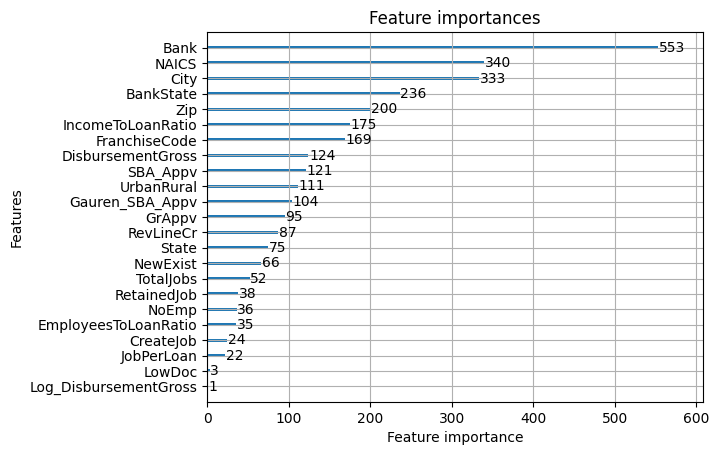

In [22]:
study = optuna.create_study(direction="maximize", study_name="LGBM Classifier")
func = lambda trial: objective(trial, X_train, y_train)
study.optimize(func, n_trials=200)

print('Best hyperparameters:', study.best_params)
print('Best AUCPR:', study.best_value)
plt.figure(figsize=(12,6))
lgb.plot_importance(lgb_clf, max_num_features=30)
plt.title("Feature importances")
plt.show()


In [23]:
optuna.visualization.plot_optimization_history(study)

In [24]:
optuna.visualization.plot_slice(study)

In [25]:
optuna.visualization.plot_param_importances(study)

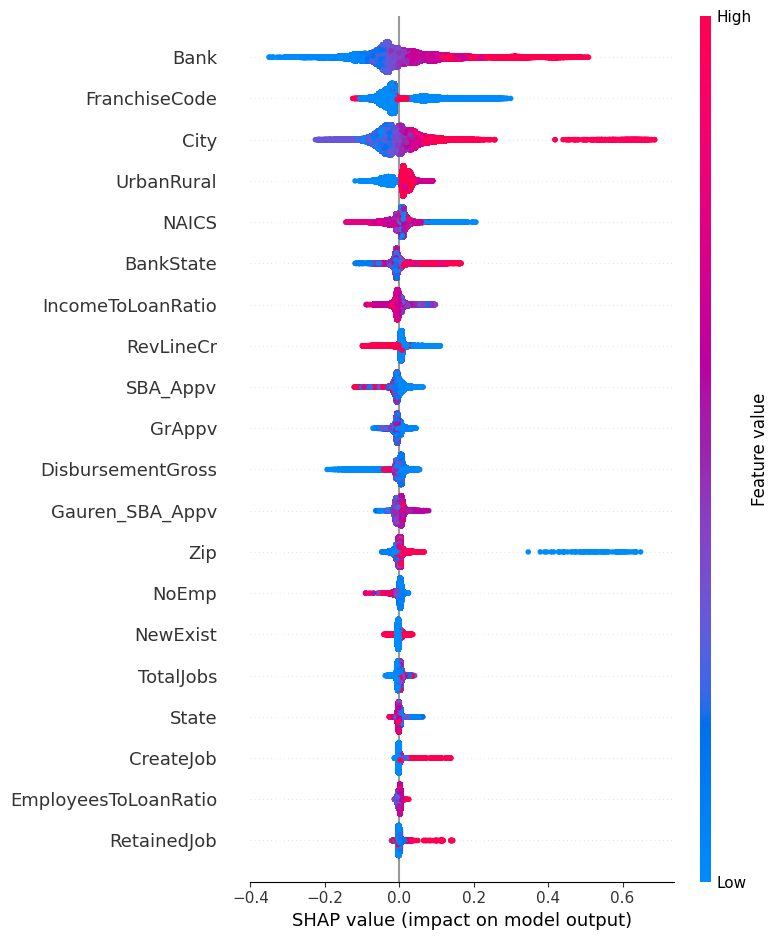

In [26]:
import shap
explainer = shap.TreeExplainer(lgb_clf)
shap_values = explainer.shap_values(X_test)

# Plot SHAP summary plot (for all features)
shap.summary_plot(shap_values, X_test) 
plt.show()

In [27]:
import pickle

# Assuming you have a variable named 'best_params' containing the best hyperparameters
best_params = study.best_params

with open('best_params.pkl', 'wb') as f:
    pickle.dump(best_params, f)

In [28]:
best_params


{'learning_rate': 0.20668077163335938,
 'num_leaves': 380,
 'max_depth': 16,
 'min_data_in_leaf': 200,
 'lambda_l1': 1.6468400748799057,
 'lambda_l2': 0.626430742906075,
 'bagging_fraction': 1.0,
 'bagging_freq': 5,
 'feature_fraction': 1.0,
 'is_unbalance': True}

In [29]:
print(f"\tBest value (AUC): {study.best_value:.5f}")
print(f"\tBest params:")

for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")

print("Best model best_iteration:", study_model_iteractions[study.best_trial.number])

	Best value (AUC): 0.80348
	Best params:
		learning_rate: 0.20668077163335938
		num_leaves: 380
		max_depth: 16
		min_data_in_leaf: 200
		lambda_l1: 1.6468400748799057
		lambda_l2: 0.626430742906075
		bagging_fraction: 1.0
		bagging_freq: 5
		feature_fraction: 1.0
		is_unbalance: True
Best model best_iteration: 41.4


In [30]:
best_params = {"verbose": -1,
                "objective":"binary",
                "metric":"auc"
            }
for key,val in study.best_params.items():
    best_params[key] = val

best_params["num_iterations"] = int(study_model_iteractions[study.best_trial.number])
print(best_params)

{'verbose': -1, 'objective': 'binary', 'metric': 'auc', 'learning_rate': 0.20668077163335938, 'num_leaves': 380, 'max_depth': 16, 'min_data_in_leaf': 200, 'lambda_l1': 1.6468400748799057, 'lambda_l2': 0.626430742906075, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True, 'num_iterations': 41}


# Training the model with parameters found using Optuna

In [31]:

train_data = lgb.Dataset(data=X_train, label=y_train, params={"verbose":-1}, categorical_feature=categorical_columns)
test_data = lgb.Dataset(data=X_test, label=y_test, params={"verbose":-1}, categorical_feature=categorical_columns)
best_lgb = lgb.train(params=best_params,
                    train_set=train_data) 

In [32]:
print("AUC score on Test dataset:", roc_auc_score(y_test, best_lgb.predict(X_test)))
print("AUC score on Train dataset:", roc_auc_score(y_train, best_lgb.predict(X_train)))

AUC score on Test dataset: 0.8068301908163129
AUC score on Train dataset: 0.8412170420735552


In [33]:
from sklearn.metrics import f1_score
import numpy as np

def calculate_optimal_threshold(classifier, X, y):
    # Predict probabilities
    y_pred_proba = classifier.predict(X)
    
    # Set a range of thresholds to test
    thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    best_f1 = 0
    best_threshold = 0
    
    # Find the threshold that maximizes the F1 score
    for threshold in thresholds:
      y_pred = (y_pred_proba > threshold).astype(int)
      f1 = f1_score(y_test, y_pred, average='macro')
    
      if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold
    return best_threshold
    
   

In [34]:
calculate_optimal_threshold(best_lgb, X_test, y_test)

0.7

In [35]:
from sklearn.metrics import f1_score

# Assuming best_lgb is the trained LightGBM model and X_test, y_test are defined

# Get the predicted probabilities for the positive class (class 1)
y_pred_proba = best_lgb.predict(X_test)

# Set a range of thresholds to test
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

best_f1 = 0
best_threshold = 0

# Find the threshold that maximizes the F1 score
for threshold in thresholds:
    y_pred = (y_pred_proba > threshold).astype(int)
    f1 = f1_score(y_test, y_pred, average='macro')
    
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

print("Best F1 score:", best_f1)
print("Best threshold:", best_threshold)

Best F1 score: 0.687680859995972
Best threshold: 0.7


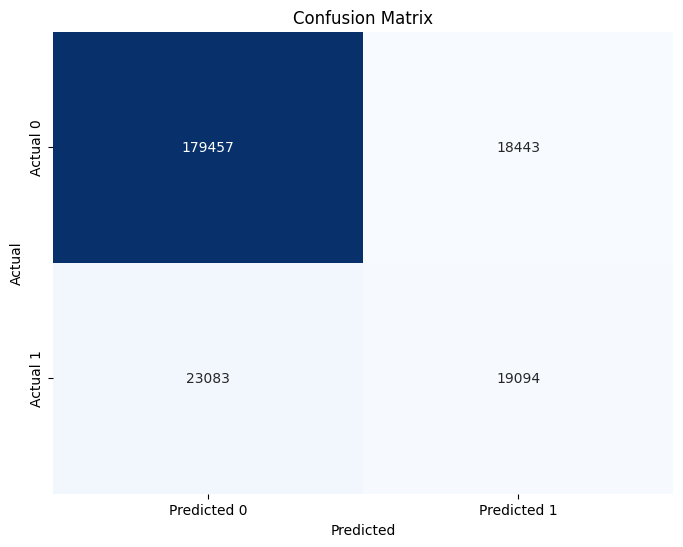

In [36]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Get the predicted probabilities for the positive class (class 1) from the test set
y_pred_proba = best_lgb.predict(X_test)

# Use the threshold obtained earlier to predict binary labels
threshold = best_threshold
y_pred = (y_pred_proba > threshold).astype(int)

# Construct the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [37]:
import pickle

# Assuming you have a variable named 'best_params' containing the best hyperparameters
best_params = best_params

with open('best_params.pkl', 'wb') as f:
    pickle.dump(best_params, f)

In [38]:
from sklearn.metrics import f1_score
import numpy as np

def calculate_optimal_threshold(classifier, X, y):
    # Predict probabilities
    y_pred_proba = classifier.predict(X)
    
    # Set a range of thresholds to test
    thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    best_f1 = 0
    best_threshold = 0
    
    # Find the threshold that maximizes the F1 score
    for threshold in thresholds:
      y_pred = (y_pred_proba > threshold).astype(int)
      f1 = f1_score(y_test, y_pred, average='macro')
    
      if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold
    return best_threshold

In [39]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from copy import deepcopy

def train_model(df):
    """
    Train sample model and save artifacts
    """
    from sklearn.linear_model import LogisticRegression
    from optuna.integration import LightGBMPruningCallback
    import tqdm as notebook_tqdm
    from sklearn.model_selection import StratifiedKFold
    import lightgbm as lgb
    from sklearn.metrics import roc_auc_score
    import optuna
    import warnings
    import pickle
    from sklearn.impute import SimpleImputer
    from sklearn.model_selection import GridSearchCV
    import matplotlib.pyplot as plt
    from sklearn.preprocessing import FunctionTransformer
    from sklearn.metrics import average_precision_score
    import numpy as np
    import warnings
    warnings.simplefilter(action='ignore', category=FutureWarning)
    
    
    target_col = "MIS_Status"
    cols_to_drop = ['City', 'State', 'Zip','Bank', 'BankState', 'LowDoc','RevLineCr','MIS_Status']
    # Removing the index column
    if "index" in df.columns:
        df.drop(columns="index", inplace=True)
    y = df[target_col] if target_col in df.columns else None
    X = df.drop(columns=[target_col]) if target_col in df.columns else df.copy()


    # Relacing Missing values
    
    for i in df['RevLineCr']:
      if i not in ['Y','N']:
        df['RevLineCr'].replace(i,'N',inplace=True)
        print("RevLineCr",df['RevLineCr'].unique())

    for i in df['LowDoc']:
      if i not in ['Y','N']:
        df['LowDoc'].replace(i,'N',inplace=True)
        print("LowDoc",df['LowDoc'].unique())

    for i in df['NewExist']:
      if i not in [1,2]:
        df['NewExist'].replace(i,None,inplace=True)
        print("NewExist",df['NewExist'].unique())


    category_cols=['City', 'State', 'Bank', 'BankState', 'RevLineCr', 'LowDoc','NewExist']
    for column in category_cols:
        df[column]=df[column].fillna(df[column].mode()[0])

    # Target encoding the categorical columns
    categorical_columns = ['City', 'State', 'Bank', 'BankState', 'RevLineCr', 'LowDoc','NewExist']
    encoder = ce.TargetEncoder(cols=categorical_columns)
    encoder.fit(df[categorical_columns], df['MIS_Status'])
    train_encoded = encoder.transform(df[categorical_columns])
    train_encoded = train_encoded.add_suffix('_trg')
    #train_encoded = pd.concat([train_encoded, data], axis=1)
    train_encoded = pd.concat([train_encoded, df], axis=1)
    for column in categorical_columns:
        train_encoded[column + "_trg"].fillna(train_encoded[column + "_trg"].mean(), inplace=True)
    
    # Renaming the columns
    #train_encoded.rename(columns={col: col + "_trg" if col in categorical_columns else col for col in train_encoded.columns}, inplace=False)
    print(train_encoded.columns)
    


    # Adding Features
    import numpy as np
    # Apply the log transformation to the specific feature in your training data
    small_constant = 1e-10  # You can adjust this constant as needed
    # df['LogColumn'] = np.log(df['OriginalColumn'] + small_constant)
    train_encoded['Log_DisbursementGross'] = np.log1p(train_encoded['DisbursementGross'])
    train_encoded['Log_GrAppv'] = np.log1p(train_encoded['GrAppv'])
    train_encoded['Log_SBA_Appv'] = np.log1p(train_encoded['SBA_Appv'])
    train_encoded['Log_BalanceGross'] = np.log1p(train_encoded['BalanceGross'])
    train_encoded['TotalJobs'] = train_encoded['CreateJob'] + train_encoded['RetainedJob']
    #train_encoded['Loan_Efficiency'] = train_encoded['DisbursementGross'] / (train_encoded['CreateJob'] + train_encoded['RetainedJob'] + 1)
    # Calculate 'LoanToIncomeRatio' as a ratio of 'SBA_Appv' to 'DisbursementGross'
    train_encoded['IncomeToLoanRatio'] = train_encoded['DisbursementGross'] / train_encoded['SBA_Appv']
    # Calculate 'LoanToEmployeesRatio' as a ratio of 'SBA_Appv' to 'NoEmp'
    train_encoded['EmployeesToLoanRatio'] = train_encoded['NoEmp'] / train_encoded['SBA_Appv']
    # Create a binary feature to indicate loans with a balance ('BalanceGross' > 0)
    #train_encoded['HasBalance'] = (train_encoded['BalanceGross'] > 0).astype(int)
    # Calculate 'LoanPerJob' as a ratio of 'SBA_Appv' to 'TotalJobs'
    train_encoded['JobPerLoan'] = train_encoded['TotalJobs'] / train_encoded['SBA_Appv'] 
    # Calculate SBA's Gaurenteed Portion of Approved Loan
    train_encoded['Gauren_SBA_Appv'] = train_encoded['GrAppv'] / train_encoded['SBA_Appv']

    
    # Scaling the numerical columns
    numerical_columns = [ 'NoEmp', 'CreateJob', 'RetainedJob', 'GrAppv', 'SBA_Appv', 'DisbursementGross', 'BalanceGross',
                        'Log_DisbursementGross', 'Log_GrAppv', 'Log_SBA_Appv', 'Log_BalanceGross','TotalJobs','IncomeToLoanRatio', 
                        'EmployeesToLoanRatio', 'JobPerLoan', 'Gauren_SBA_Appv']
    
    scaler = StandardScaler()
    #fit and transform separately
    scaler.fit(train_encoded[numerical_columns])
    train_encoded[numerical_columns] = scaler.transform(train_encoded[numerical_columns])

    warnings.filterwarnings("ignore", category=UserWarning)
    study_model_iteractions = {}

    def objective(trial, X, y):
     
      param_grid = {
        # Refer to the Official guide : https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html
        "num_iterations": 10000,
        "num_threads": 16,
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, step=0.05),
        #"num_leaves": trial.suggest_int("num_leaves", 50, 150, step=5),
        "num_leaves": trial.suggest_int("num_leaves", 20, 3000, step=20),
        #"max_depth": trial.suggest_int("max_depth", 5, 20, step=2),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 100, 1000, step=100),
        ##############################
        #'lambda_l1': trial.suggest_float('lambda_l1', 1e-8, 10.0, log=True),
        #'lambda_l2': trial.suggest_float('lambda_l2', 1e-8, 10.0, log=True),
        "lambda_l1": trial.suggest_int("lambda_l1", 0, 100, step=5),
        "lambda_l2": trial.suggest_int("lambda_l2", 0, 100, step=5),
        #"lambda_l1": trial.suggest_float("lambda_l1", 0.01, 0.1, step=0.01),
        #"lambda_l2": trial.suggest_float("lambda_l2", 0.01, 0.1, step=0.01),
        ########################
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.8, 1.0, step=0.1),
        "bagging_freq": trial.suggest_categorical("bagging_freq", [5]),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.8, 1.0, step=0.1),
        #######################
        "is_unbalance": trial.suggest_categorical("is_unbalance",[True, False]),
        ########################
        "verbose": -1,
        "objective":"binary",
        "metric":"auc",
        "num_threads": 12
       }

      cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1121218)

      cv_scores = np.empty(5)
      cv_iteractions = np.empty(5)
      for idx, (train_idx, test_idx) in enumerate(cv.split(X, y)):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        train_data = lgb.Dataset(data=X_train, label=y_train, params={"verbose":-1}, categorical_feature=categorical_columns)
        valid_data = lgb.Dataset(data=X_test, label=y_test, params={"verbose":-1}, categorical_feature=categorical_columns)
        lgb_clf = lgb.train(params=param_grid,
                            train_set=train_data,
                            valid_sets=[valid_data],
                            categorical_feature=categorical_columns,
                            callbacks=[LightGBMPruningCallback(trial, "auc"),
                                        lgb.early_stopping(stopping_rounds=5)]  
                            )
        preds = lgb_clf.predict(X_test)
        cv_scores[idx] = roc_auc_score(y_test, preds)
        cv_iteractions[idx] = lgb_clf.best_iteration
    
      study_model_iteractions[trial.number] = np.mean(cv_iteractions)

      study = optuna.create_study(direction="maximize", study_name="LGBM Classifier")
      func = lambda trial: objective(trial, X_train, y_train)
      study.optimize(func, n_trials=200)
      print('Best hyperparameters:', study.best_params)
      print('Best AUCPR:', study.best_value)

      print(f"\tBest value (AUC): {study.best_value:.5f}")
      print(f"\tBest params:")
      plt.figure(figsize=(12,6))
      lgb.plot_importance(model, max_num_features=30)
      plt.title("Feature importances")
      plt.show()

      for key, value in study.best_params.items():
        print(f"\t\t{key}: {value}")

      print("Best model best_iteration:", study_model_iteractions[study.best_trial.number])
      best_iterations = study_model_iteractions[study.best_trial.number] 

        
    

          
   
      # End Todo
      
      # Saving the artifacts
      artifacts_dict = {
        "model": lgb_clf,
        "target_encoder": encoder,
        "te_columns": categorical_columns,
        "columns_to_train":train_data,
        "numerical_columns":numerical_columns,
        "category_cols": category_cols,
        "scaler":scaler
          }

      #calculating threshold
      if y is not None:
        #optimal_threshold = calculate_optimal_threshold(clf_, train_encoded[columns_to_train], y)
        optimal_threshold = calculate_optimal_threshold(lgb_clf, train_encoded.columns, y)
        print(f"Optimal Threshold: {optimal_threshold}")
        # Saving the threshold in artifacts
        artifacts_dict["threshold"] = optimal_threshold

      artifacts_dict_file = open("./Artifacts/artifacts_dict_file.pkl", "wb")
      pickle.dump(obj=artifacts_dict, file=artifacts_dict_file)    
       
      artifacts_dict_file.close()    
      return lgb_clf

In [40]:
from IPython.core.display import display, HTML
display(HTML("<style>.output_scroll { height:auto !important; max-height: none !important; }</style>"))
pd.set_option('display.max_rows', 5000)
from sklearn.model_selection import train_test_split
        
df = pd.read_csv("D:/Work/Gre/UTD/Courses/Fall/MIS6341/Softwares/Python/ml-fall-2023/Project2/SBA_loans_project_2.csv")
target = "MIS_Status"
y = df[target]
x = df.drop(columns=[target])

# Splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)
y_test.reset_index(inplace=True, drop=True)
df_train = X_train.copy()
df_train[target] = y_train
train_model(df_train)

RevLineCr ['N' 'Y' 'T' nan '1' 'R' '`' 'Q' '-' '7' '2' '4' '.' 'C']
RevLineCr ['N' 'Y' nan '1' 'R' '`' 'Q' '-' '7' '2' '4' '.' 'C']
RevLineCr ['N' 'Y' '1' 'R' '`' 'Q' '-' '7' '2' '4' '.' 'C']
RevLineCr ['N' 'Y' 'R' '`' 'Q' '-' '7' '2' '4' '.' 'C']
RevLineCr ['N' 'Y' '`' 'Q' '-' '7' '2' '4' '.' 'C']
RevLineCr ['N' 'Y' 'Q' '-' '7' '2' '4' '.' 'C']
RevLineCr ['N' 'Y' '-' '7' '2' '4' '.' 'C']
RevLineCr ['N' 'Y' '7' '2' '4' '.' 'C']
RevLineCr ['N' 'Y' '2' '4' '.' 'C']
RevLineCr ['N' 'Y' '4' '.' 'C']
RevLineCr ['N' 'Y' '.' 'C']
RevLineCr ['N' 'Y' 'C']
RevLineCr ['N' 'Y']
LowDoc ['N' 'Y' 'C' nan 'A' 'S' 'R']
LowDoc ['N' 'Y' nan 'A' 'S' 'R']
LowDoc ['N' 'Y' 'A' 'S' 'R']
LowDoc ['N' 'Y' 'S' 'R']
LowDoc ['N' 'Y' 'R']
LowDoc ['N' 'Y']
NewExist [1.0 2.0 None nan]
NewExist [1.0 2.0 None nan]
NewExist [1.0 2.0 None nan]
NewExist [1.0 2.0 None nan]
NewExist [1.0 2.0 None nan]
NewExist [1.0 2.0 None nan]
NewExist [1.0 2.0 None nan]
NewExist [1.0 2.0 None nan]
NewExist [1.0 2.0 None nan]
NewExist [1.0 

In [41]:
def scoring(data):
    """
    Function to score input dataset.
    
    Input: dataset in Pandas DataFrame format
    Output: Python list of labels in the same order as input records
    
    Flow:
        - Load artifacts
        - Transform dataset
        - Score dataset
        - Return labels
    
    """
    
    if "index" in data.columns:
        data.drop(columns="index", inplace=True)
    #Load Artifacts
    artifacts_dict_file = open("./Artifacts/artifacts_dict_file.pkl", "rb")
    artifacts_dict = pickle.load(file=artifacts_dict_file)
    artifacts_dict_file.close()
    

    clf = artifacts_dict["model"]
    te = artifacts_dict["target_encoder"]
    te_columns = artifacts_dict["te_columns"]
    columns_to_score = artifacts_dict["columns_to_train"]
    threshold = artifacts_dict["threshold"]
    category_cols = artifacts_dict["category_cols"]
    numerical_columns = artifacts_dict["numerical_columns"]
    scaler = artifacts_dict["scaler"]

     # Replacing the missing values
    for i in data['RevLineCr']:
        if i not in ['Y','N']:
            data['RevLineCr'].replace(i,'N',inplace=True)

    for i in data['LowDoc']:
        if i not in ['Y','N']:
            data['LowDoc'].replace(i,'N',inplace=True)

    for i in data['NewExist']:
        if i not in [1,2]:
            data['NewExist'].replace(i,None,inplace=True)

    for column in category_cols:
        data[column]=data[column].fillna(data[column].mode()[0])

    
    # 10 New Feature Extractions
    import numpy as np
    # Apply the log transformation to the specific feature in your training data
    small_constant = 1e-10  # You can adjust this constant as needed
    # df['LogColumn'] = np.log(df['OriginalColumn'] + small_constant)
    data['Log_DisbursementGross'] = np.log1p(data['DisbursementGross'])
    data['Log_GrAppv'] = np.log1p(data['GrAppv'])
    data['Log_SBA_Appv'] = np.log1p(data['SBA_Appv'])
    data['Log_BalanceGross'] = np.log1p(data['BalanceGross'])
    data['TotalJobs'] = data['CreateJob'] + data['RetainedJob']
    #train_encoded['Loan_Efficiency'] = train_encoded['DisbursementGross'] / (train_encoded['CreateJob'] + train_encoded['RetainedJob'] + 1)
    # Calculate 'LoanToIncomeRatio' as a ratio of 'SBA_Appv' to 'DisbursementGross'
    data['IncomeToLoanRatio'] = data['DisbursementGross'] / data['SBA_Appv']
    # Calculate 'LoanToEmployeesRatio' as a ratio of 'SBA_Appv' to 'NoEmp'
    data['EmployeesToLoanRatio'] = data['NoEmp'] / data['SBA_Appv']
    # Create a binary feature to indicate loans with a balance ('BalanceGross' > 0)
    #train_encoded['HasBalance'] = (train_encoded['BalanceGross'] > 0).astype(int)
    # Calculate 'LoanPerJob' as a ratio of 'SBA_Appv' to 'TotalJobs'
    data['JobPerLoan'] = data['TotalJobs'] / data['SBA_Appv'] 
    # Calculate SBA's Gaurenteed Portion of Approved Loan
    data['Gauren_SBA_Appv'] = data['GrAppv'] / data['SBA_Appv']


    # Scaling the numerical columns
    data[numerical_columns] = scaler.transform(data[numerical_columns])                             
    
    # Target encoding the categorical columns
    data_encoded = te.transform(data[te_columns])
    data_encoded = data_encoded.add_suffix('_trg')
    data_encoded = pd.concat([data_encoded, data], axis=1)
    
    # Renaming the columns
    
    for column in te_columns:
        data_encoded[column + "_trg"].fillna(data_encoded[column + "_trg"].mean(), inplace=True)
    
    # Predicting the probabilities
    y_prob = clf.predict_proba(data_encoded[columns_to_score])
    y_pred = (y_prob[:,0] < threshold).astype(int)
    d = {
        "index": data.index,
        "label": y_pred,
        "probability_0": y_prob[:,0],
        "probability_1": y_prob[:,1],
        "threshold":threshold
    }
    #print(y_prob)
    return pd.DataFrame(d)

In [42]:
print(scoring(X_test))

         index  label  probability_0  probability_1  threshold
0            0      1       0.500004       0.499996   0.505051
1            1      0       0.639739       0.360261   0.505051
2            2      1       0.500004       0.499996   0.505051
3            3      0       0.789032       0.210968   0.505051
4            4      0       0.878069       0.121931   0.505051
...        ...    ...            ...            ...        ...
160046  160046      1       0.500004       0.499996   0.505051
160047  160047      0       0.745296       0.254704   0.505051
160048  160048      0       0.749889       0.250111   0.505051
160049  160049      1       0.500004       0.499996   0.505051
160050  160050      0       0.641459       0.358541   0.505051

[160051 rows x 5 columns]


In [43]:
print(scoring(X_train))

         index  label  probability_0  probability_1  threshold
0            0      0       0.789022       0.210978   0.505051
1            1      0       0.788778       0.211222   0.505051
2            2      0       0.914288       0.085712   0.505051
3            3      0       0.592463       0.407537   0.505051
4            4      0       0.850401       0.149599   0.505051
...        ...    ...            ...            ...        ...
640199  640199      0       0.745758       0.254242   0.505051
640200  640200      0       0.819364       0.180636   0.505051
640201  640201      0       0.748059       0.251941   0.505051
640202  640202      0       0.567862       0.432138   0.505051
640203  640203      0       0.748531       0.251469   0.505051

[640204 rows x 5 columns]


In [44]:
df2 = pd.read_csv("D:/Work/Gre/UTD/Courses/Fall/MIS6341/Softwares/Python/ml-fall-2023/Project2/SBA_loans_project_2_holdout_students_valid.csv")


In [45]:
print(scoring(df2))

       index  label  probability_0  probability_1  threshold
0          0      1       0.500004       0.499996   0.505051
1          1      0       0.736423       0.263577   0.505051
2          2      1       0.500004       0.499996   0.505051
3          3      0       0.639853       0.360147   0.505051
4          4      0       0.539377       0.460623   0.505051
...      ...    ...            ...            ...        ...
98904  98904      0       0.746682       0.253318   0.505051
98905  98905      0       0.737303       0.262697   0.505051
98906  98906      1       0.500004       0.499996   0.505051
98907  98907      1       0.500004       0.499996   0.505051
98908  98908      1       0.500004       0.499996   0.505051

[98909 rows x 5 columns]


In [46]:
print(scoring(X_test))

         index  label  probability_0  probability_1  threshold
0            0      1       0.500004       0.499996   0.505051
1            1      0       0.639739       0.360261   0.505051
2            2      1       0.500004       0.499996   0.505051
3            3      0       0.789032       0.210968   0.505051
4            4      0       0.878069       0.121931   0.505051
...        ...    ...            ...            ...        ...
160046  160046      1       0.500004       0.499996   0.505051
160047  160047      0       0.745296       0.254704   0.505051
160048  160048      0       0.749889       0.250111   0.505051
160049  160049      1       0.500004       0.499996   0.505051
160050  160050      0       0.641459       0.358541   0.505051

[160051 rows x 5 columns]


In [47]:
print(scoring(df2[100:200]))

    index  label  probability_0  probability_1  threshold
0     100      0       0.852914       0.147086   0.505051
1     101      0       0.852942       0.147058   0.505051
2     102      0       0.749898       0.250102   0.505051
3     103      0       0.692439       0.307561   0.505051
4     104      0       0.819329       0.180671   0.505051
5     105      0       0.568328       0.431672   0.505051
6     106      1       0.500004       0.499996   0.505051
7     107      0       0.745293       0.254707   0.505051
8     108      0       0.852912       0.147088   0.505051
9     109      0       0.747600       0.252400   0.505051
10    110      0       0.694358       0.305642   0.505051
11    111      0       0.852914       0.147086   0.505051
12    112      0       0.746689       0.253311   0.505051
13    113      0       0.750847       0.249153   0.505051
14    114      1       0.500004       0.499996   0.505051
15    115      0       0.751205       0.248795   0.505051
16    116     